In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
!pip install pandas_datareader
import pandas_datareader as pr

In [198]:
df = pr.get_data_yahoo("YAYLA.IS", start = "2019-01-01", end="2020-07-05")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,0.94,0.94,0.94,0.94,0,0.94
2019-01-02,0.94,0.91,0.94,0.91,2026223,0.91
2019-01-03,0.93,0.89,0.93,0.90,1936699,0.90
2019-01-04,0.91,0.88,0.90,0.91,1225586,0.91
2019-01-07,0.91,0.89,0.91,0.91,866518,0.91
...,...,...,...,...,...,...
2020-06-29,2.91,2.66,2.74,2.89,16323429,2.89
2020-06-30,3.05,2.80,2.90,2.94,15112178,2.94
2020-07-01,3.08,2.90,3.00,2.99,10176999,2.99


# YAYLA

In [199]:
kapanis_print = df["Close"]

In [200]:
kapanis_print.tail()

Date
2020-06-29    2.89
2020-06-30    2.94
2020-07-01    2.99
2020-07-02    2.97
2020-07-03    2.94
Name: Close, dtype: float64

# Linear
* acilis - kapanis
* acilis - yukselis

## Acilis - kapanis Liner

In [201]:
liner_regression = LinearRegression()
acilis = df.Open.values.reshape(-1,1)
kapanis = df.Close.values.reshape(-1,1)

In [202]:
liner_regression.fit(acilis, kapanis)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [203]:
print(liner_regression.predict([[2.95]]).reshape(-1,1))

[[2.95041624]]


In [204]:
kapanis = df["Close"]
acilis = df["Open"]
kapanis.index = pd.DatetimeIndex(kapanis.index)
acilis.index = pd.DatetimeIndex(acilis.index)

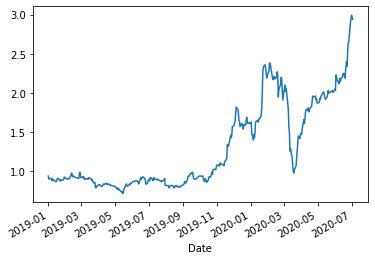

In [205]:
kapanis.plot();

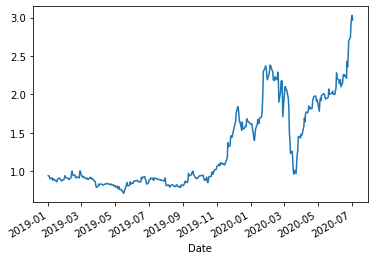

In [206]:
acilis.plot()

## Acilis - yukselis Liner -BAK

In [207]:
liner_regression = LinearRegression()
acilis_liner = df.Open.values.reshape(-1,1)
yukselis_liner = df.High.values.reshape(-1,1)

In [208]:
liner_regression.fit(acilis_liner, yukselis_liner)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
print(liner_regression.predict([[2.95]]).reshape(-1,1))

[[3.03995691]]


# Decision Tree
* acilis - kapanis
* acilis - yukselis

In [210]:
df = pr.get_data_yahoo("YAYLA.IS", start = "2019-01-01", end="2020-07-05")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,0.94,0.94,0.94,0.94,0,0.94
2019-01-02,0.94,0.91,0.94,0.91,2026223,0.91
2019-01-03,0.93,0.89,0.93,0.90,1936699,0.90
2019-01-04,0.91,0.88,0.90,0.91,1225586,0.91
2019-01-07,0.91,0.89,0.91,0.91,866518,0.91
...,...,...,...,...,...,...
2020-06-29,2.91,2.66,2.74,2.89,16323429,2.89
2020-06-30,3.05,2.80,2.90,2.94,15112178,2.94
2020-07-01,3.08,2.90,3.00,2.99,10176999,2.99


## Acilis - Kapanis

In [211]:
acilis_decision = df.Open.values.reshape(-1,1)
kapanis_decision = df.Close.values.reshape(-1,1)

In [212]:
decision_tree_regression = DecisionTreeRegressor()
decision_tree_regression.fit(acilis_decision,kapanis_decision)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [213]:
print(decision_tree_regression.predict([[2.95]]).reshape(-1,1))

[[2.94000006]]


## acilis yukselis

In [214]:
acilis_decision2 = df.Open.values.reshape(-1,1)
yuksek_decision2 = df.High.values.reshape(-1,1)
decision_tree_regression2 = DecisionTreeRegressor()
decision_tree_regression2.fit(acilis_decision2, yuksek_decision2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [215]:
print(decision_tree_regression2.predict([[2.95]]).reshape(-1,1))

[[3.]]


In [216]:
# tahmin dogruluk payi
print(r2_score(acilis_decision2, decision_tree_regression2.predict(yuksek_decision2)))

0.9702422902283776


# RandomForestregressor
* acilis - kapanis
* acilis - yukselis

## acilis - kapanis 

In [217]:
acilis_forest = df.Open.values.reshape(-1,1)
kapanis_forest = df.Close.values.reshape(-1,1)
kapanis_random_regression = RandomForestRegressor(n_estimators=10, random_state=2)
kapanis_random_regression.fit(acilis_forest, kapanis_forest)

C:\Users\suubc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [218]:
print(kapanis_random_regression.predict([[2.95]]).reshape(-1,1))

[[2.95300004]]


In [219]:
# print(metrics(acilis, kapanis_random_regression.predict(kapanis)))

In [220]:
# print(r2_score(acilis, kapanis_random_regression.predict(kapanis)))

In [221]:
# tahmin dogruluk payi
print(r2_score(acilis_forest, kapanis_random_regression.predict(kapanis_forest)))

0.9876881475955305


## Acilis - yukselis

In [222]:
acilis_forest2 = df.Open.values.reshape(-1,1)
yukselis_forest2 = df.High.values.reshape(-1,1)
yukselis_random_regression = RandomForestRegressor(n_estimators=10, random_state=2)
yukselis_random_regression.fit(acilis_forest2, yukselis_forest2)

C:\Users\suubc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [223]:
print(yukselis_random_regression.predict([[2.95]]).reshape(-1,1))

[[3.03199997]]


In [224]:
# tahmin dogruluk payi
print(r2_score(acilis_forest2, yukselis_random_regression.predict(yukselis_forest2)))

0.9715684792598389


# ANACAM

In [225]:
anacam = pr.get_data_yahoo("ANACM.IS", start = "2019-01-01", end="2020-07-05")
anacam

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-01,2.67,2.67,2.67,2.67,0.0,2.499430
2019-01-02,2.69,2.55,2.69,2.58,2741054.0,2.415180
2019-01-03,2.58,2.46,2.58,2.48,2215041.0,2.321568
2019-01-04,2.72,2.47,2.48,2.53,2513511.0,2.368374
2019-01-07,2.60,2.54,2.56,2.55,1988753.0,2.387096
...,...,...,...,...,...,...
2020-06-29,4.74,4.56,4.63,4.62,6990143.0,4.620000
2020-06-30,4.69,4.62,4.63,4.64,3627601.0,4.640000
2020-07-01,4.76,4.64,4.67,4.72,5169350.0,4.720000


# anacam acilis - kapanis - BAK

In [226]:
liner_regression = LinearRegression()
acilis_liner = anacam.Open.values.reshape(-1,1)
kapanis_liner = anacam.Close.values.reshape(-1,1)

In [227]:
liner_regression.fit(acilis_liner, kapanis_liner)
print(liner_regression.predict([[5.20]]).reshape(-1,1))

[[5.20232755]]


# anacam acilis - yukselis - BAK

In [228]:
liner_regression2 = LinearRegression()
acilis_liner2 = anacam.Open.values.reshape(-1,1)
yukselis_liner2 = anacam.High.values.reshape(-1,1)

In [229]:
liner_regression2.fit(acilis_liner2, yukselis_liner2)
print(liner_regression2.predict([[5.20]]).reshape(-1,1))

[[5.2975932]]


# ANACAM Decision Tree
* acilis - kapanis
* acilis - yukselis

## acilis - kapanis

In [230]:
anacam_acilis_decision = anacam.Open.values.reshape(-1,1)
anacam_kapanis_decision = anacam.Close.values.reshape(-1,1)

In [231]:
anacam_decision_tree_regression = DecisionTreeRegressor()
anacam_decision_tree_regression.fit(anacam_acilis_decision,anacam_kapanis_decision)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [232]:
print(anacam_decision_tree_regression.predict([[5.20]]).reshape(-1,1))

[[4.9000001]]


In [233]:
# tahmin dogruluk payi
print(r2_score(anacam_acilis_decision, anacam_decision_tree_regression.predict(anacam_kapanis_decision)))

0.9826320654858651


## acilis - yukselis

In [234]:
anacam_acilis_decision2 = anacam.Open.values.reshape(-1,1)
anacam_yuksek_decision2 = anacam.High.values.reshape(-1,1)
anacam_decision_tree_regression2 = DecisionTreeRegressor()
anacam_decision_tree_regression2.fit(anacam_acilis_decision2, anacam_yuksek_decision2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [235]:
print(anacam_decision_tree_regression2.predict([[5.20]]).reshape(-1,1))

[[5.07000017]]


In [236]:
# tahmin dogruluk payi
print(r2_score(anacam_acilis_decision2, anacam_decision_tree_regression2.predict(anacam_yuksek_decision2)))

0.9547052337447404


# ANACAM RandomForestregressor
* acilis - kapanis
* acilis - yukselis

## ANACAM acilis - kapanis

In [237]:
anacam_acilis_forest = anacam.Open.values.reshape(-1,1)
anacam_kapanis_forest = anacam.Close.values
anacam_kapanis_random_regression = RandomForestRegressor(n_estimators=10, random_state=2)
anacam_kapanis_random_regression.fit(anacam_acilis_forest, anacam_kapanis_forest)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [238]:
print(anacam_kapanis_random_regression.predict([[5.20]]).reshape(-1,1))

[[4.72000012]]


## ANACAM acilis - yukselis 

In [239]:
anacam_acilis_forest2 = anacam.Open.values.reshape(-1,1)
anacam_yukselis_forest2 = anacam.High.values.reshape(-1,1)
anacam_yukselis_random_regression2 = RandomForestRegressor(n_estimators=10, random_state=2)
anacam_yukselis_random_regression2.fit(anacam_acilis_forest2, anacam_yukselis_forest2)

C:\Users\suubc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [240]:
print(anacam_yukselis_random_regression2.predict([[5.20]]).reshape(-1,1))

[[4.96300015]]


In [241]:
print(r2_score(anacam_acilis_forest2, anacam_yukselis_random_regression2.predict(anacam_yukselis_forest2)))

0.958301888668912
